# script to plot comoving distance, luminosity distance and lookback time

Enter initial redshift: 50


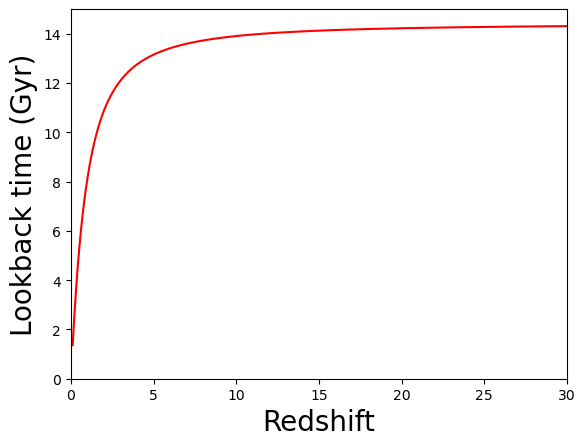

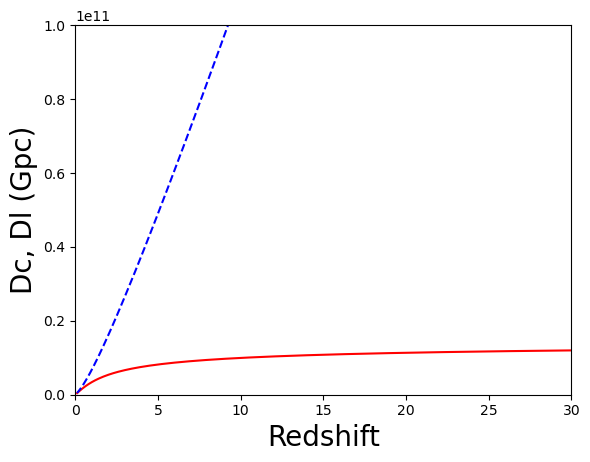

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 23 17:11:58 2019

@author: astro
"""
import scipy.integrate as integrate
#integrate is the module of scipy that performs numerical integration
H0=67.2 #Hubble constant in km/s/Mpc
convert=1e5/3.086e24*3.1536e7*1e9 #converts from km/s/Mpc to Gyr
OmegaM=0.2726 #omega matter, parameter from cosmology
OmegaL=0.7274 #omega lambda, parameter from cosmology
c=299792458. #speed of light

def looktime(z): #definition of new function looktime. 
# This function takes one argument (z)

    integrand1 = lambda x: 1./((1.+x)*(OmegaM*(1.+x)**3.+OmegaL)**0.5)
#assigning an integral function with x as variable here, it's the general integral to solve for lb_time
 
    integrand2 = lambda x: 1./((OmegaM*(1.+x)**3.+OmegaL)**0.5)
#assigning an integral function with x as variable here, it's the common integral to solve for both D_L & D_C 

    ltime=integrate.quad(integrand1, 0.0, z) #lower and upper bound of integral;integrand1

    cd=integrate.quad(integrand2, 0.0, z) #lower and upper bound of integral;integrand1

#ltime is an array of 2 elements. ltime[0]= result of integral & ltime[1] error
    
    look=ltime[0] 
    look/=(H0*convert)#look-back time formula
    cdistance=cd[0] 
    cdistance/=(H0*convert)/c #comoving distance formula
    ldistance=cd[0] 
    ldistance/=(H0*convert)/(c*(1+z)) #luminosity distance formula 
    return [look, cdistance, ldistance]  

#function looktime returns look, which is the look back time at 
#redshift z in comoving framework the main 

z = float(input("Enter initial redshift: ")) #enter the initial value for redshift 
look=[]   #look-back time list
redsh=[]  #redshift list
cdistance=[] #comoving distance list
ldistance=[] #luminosity distance list

while(z>0.0):
    look.append(looktime(z)[0]) #call looktime and append result
    cdistance.append(looktime(z)[1]) #call looktime and append result
    ldistance.append(looktime(z)[2])#call looktime and append result
    redsh.append(z)    #store z into list redsh
    z-=0.1
# The above all is same as we did in exercise 1.2 folowing is the code plotting
# To plot the graph vs redshift
 
import matplotlib.pyplot as plt
plt.plot(redsh, look, 'r-')
plt.axis([0, 30, 0, 15])
plt.xlabel('Redshift', fontsize=20)
plt.ylabel('Lookback time (Gyr)', fontsize=20)
plt.show()

plt.plot(redsh, cdistance, 'r-')
plt.plot(redsh, ldistance, 'b--')
plt.axis([0, 30, 0, 1e11])
plt.xlabel('Redshift', fontsize=20)
plt.ylabel('Dc, Dl (Gpc)', fontsize=20)
plt.show()
